<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.image as mpimg

## Ερώτημα 1

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Ερώτημα 2

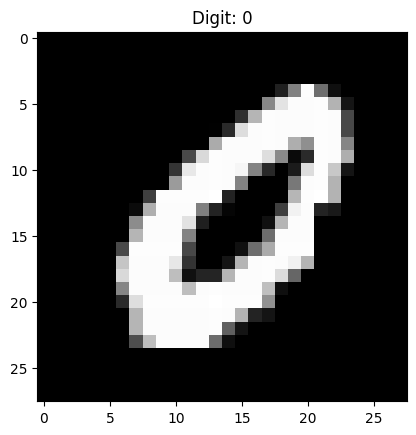

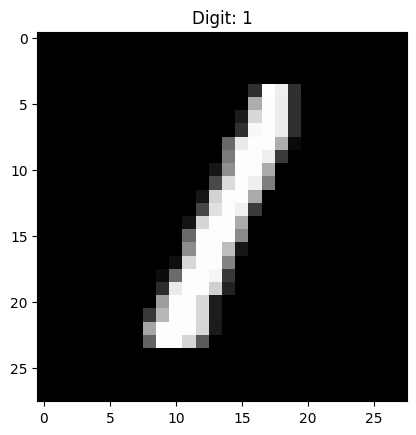

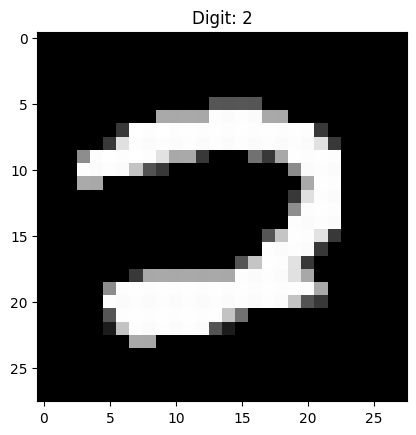

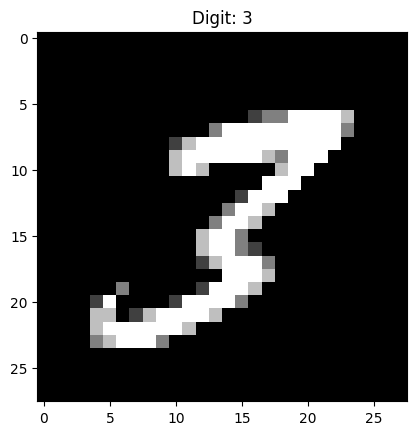

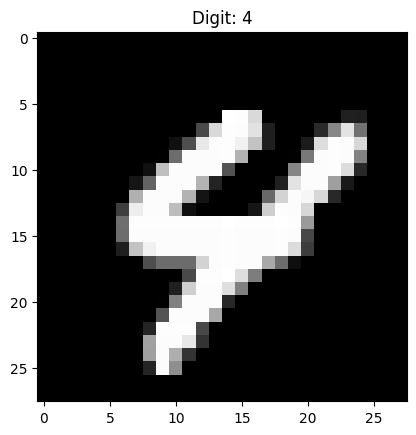

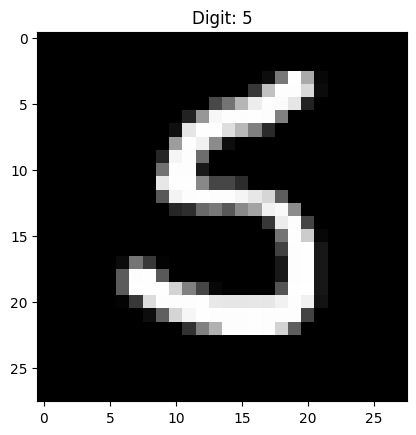

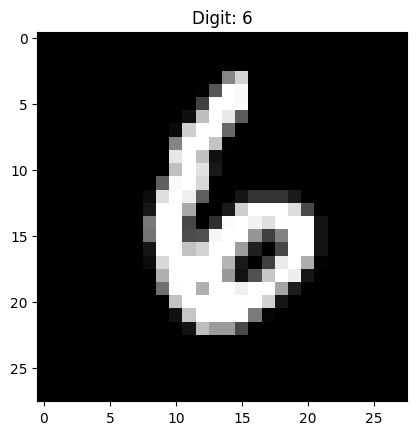

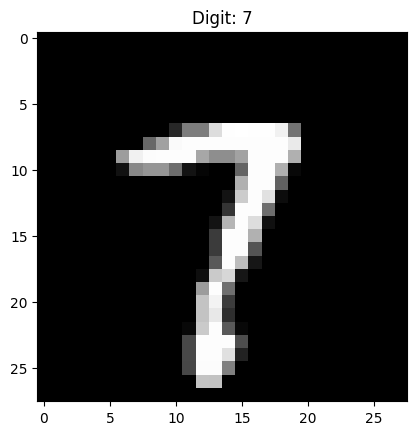

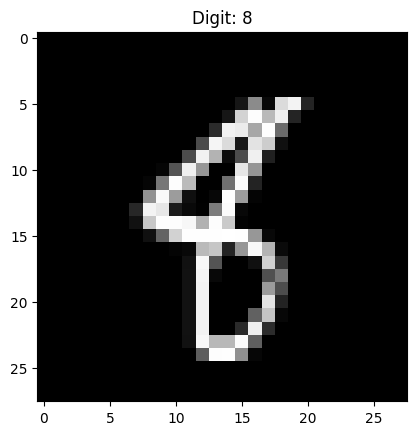

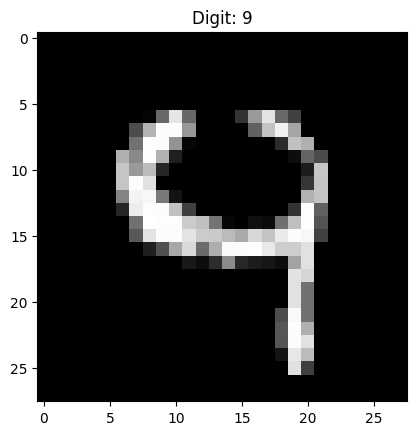

In [29]:
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    idx = random.choice(indices)
    plt.figure()
    plt.imshow(x_train[idx],cmap='gray')
    plt.title(f"Digit: {digit}")
    plt.show()

## Ερώτημα 3

Δεν είναι όλα τα pixels της εικόνας εξίσου σημαντικά, καθώς όπως φαίνεται και από τις τυπωμένες εικόνε οι οποίες είναι ενδεικτικές για κάθε ψηφίο, το ψηφίο συνήθως βρίσκεται προς το κέντρο της εικόνας ενώ το υπόλοιπο background είναι μονόχρωμο μωβ). Αυτό σημαίνει ότι τη σημαντική πληροφορία την περιέχει μόνο το κομμάτι τον pixels τα οποία απεικονίζουν το ψηφίο.
Επιπλέον, το dataset αποτελείται απότελείται κανονικά από μονοχρωμες εικόνες, το οποίο όμως στα plots φαίνεται αν χρησιμοποιηθεί η εντολή cmap='gray' στο imshow.

In [30]:
print(x_train.shape)
print(x_test.shape)
print(x_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(28, 28)


Το train set περιέχει συνολικά 60000 εικόνες ενώ το test set 10000. Κάθε εικόνα έχει διαστάσεις 28x28.

## Ερώτημα 4

In [31]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape,x_test.shape)


(60000, 784) (10000, 784)


## Ερώτημα 5

In [33]:
N = x_train.shape[0]
k = [5, 15, 51, int(np.sqrt(N))]

acc_tr = []
acc_ts = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    acc_tr.append(train_acc)
    acc_ts.append(test_acc)

    print(f"k = {i} Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")


k = 5 Train accuracy: 0.9633, Test accuracy: 0.9465
k = 15 Train accuracy: 0.9432, Test accuracy: 0.9375
k = 51 Train accuracy: 0.9082, Test accuracy: 0.9151
k = 100 Train accuracy: 0.8831, Test accuracy: 0.8944


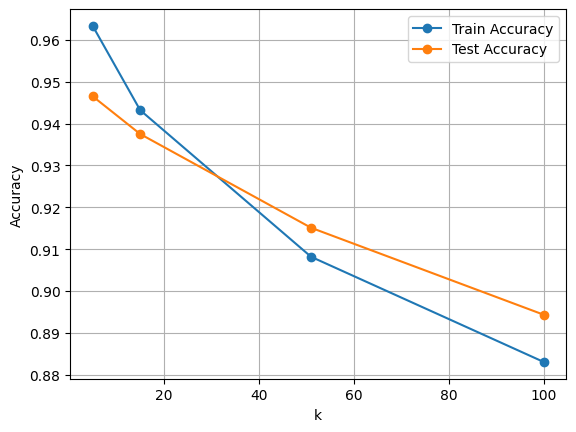

In [34]:
plt.plot(k, acc_tr, marker='o', label='Train Accuracy')
plt.plot(k, acc_ts, marker='o', label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Από το διάγραμμα παρατηρείται ότι η ακρίβεια μειώνεται καθώς αυξάνεται ο αριθμός των γειτόνων k. Για μικρές τιμές του k, ο ταξινομητής εμφανίζει υψηλή ακρίβεια στο σύνολο εκπαίδευσης, γεγονός που υποδηλώνει αυξημένη προσαρμογή στα δεδομένα. Αντίθετα, για μεγαλύτερες τιμές του k η ακρίβεια μειώνεται τόσο στο train όσο και στο test set, γεγονός που υποδηλώνει υποπροσαρμογή του μοντέλου. Συνεπώς, οι ενδιάμεσες τιμές του k προσφέρουν καλύτερη ισορροπία μεταξύ γενίκευσης και ακρίβειας.

## Ερώτημα 6

In [45]:
x_train_new = x_train / 255.0
x_test_new = x_test / 255.0

In [46]:
N = x_train_new.shape[0]
k = [5, 15, 51, int(np.sqrt(N))]

acc_tr1 = []
acc_ts1 = []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_new, y_train)

    y_pred_test = knn.predict(x_test_new)
    y_pred_train = knn.predict(x_train_new)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)

    acc_tr1.append(train_acc)
    acc_ts1.append(test_acc)

    print(f"k = {i} Train accuracy: {train_acc:.4f}, Test accuracy: {test_acc:.4f}")


k = 5 Train accuracy: 0.9633, Test accuracy: 0.9465
k = 15 Train accuracy: 0.9432, Test accuracy: 0.9375
k = 51 Train accuracy: 0.9082, Test accuracy: 0.9151
k = 100 Train accuracy: 0.8831, Test accuracy: 0.8944


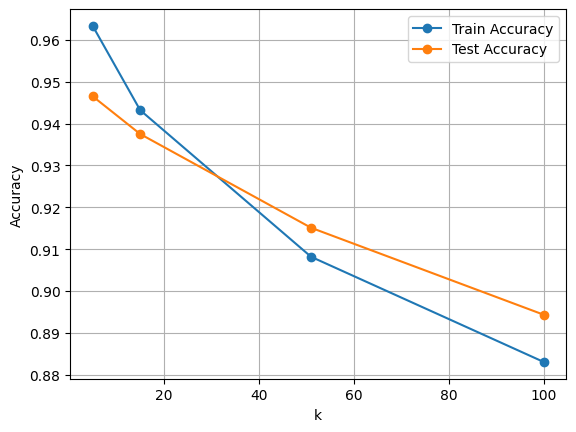

In [47]:
plt.plot(k, acc_tr1, marker='o', label='Train Accuracy')
plt.plot(k, acc_ts1, marker='o', label='Test Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Συγκρίνοντας τα αποτελέσματα πριν και μετά την διαίρεση των δεδομένων με 255 παρατηρώ ότι τα αποτελέσματα είναι τα ίδια. Αυτό συμβαίνει γιατί ο k-NN βασίζεται σε αποστάσεις και διαιρώντας όλα τα σημεία με τον ίδιο αριθμό, αλλάζω το έυρος αλλά οι  αποστάσεις των σημείν παραμένουν ίδιες.

## Ερώτημα 7

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

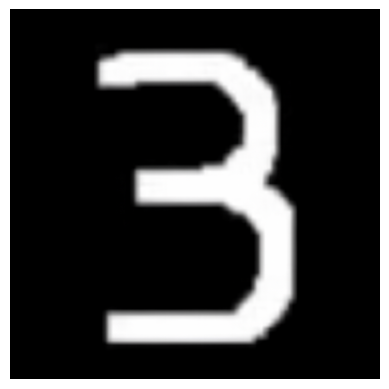

In [48]:
img = mpimg.imread('trial.png')
plt.imshow(img, cmap='gray')
plt.axis('off')


Βρες το καλυτερο κ του Ερωτηματος 6

In [49]:
best_index = np.argmax(acc_ts)
best_k = k[best_index]
print( best_k)

5


Εκπαίδευσε πάλι τον k-NN και κάνε πρόβλεψη για το νέο ψηφίο.

In [57]:
img = Image.open("trial.png").convert("L")
img = img.resize((28, 28))
img_arr = np.array(img)

img_arr = img_arr / 255.0
img_vec = img_arr.reshape(1, -1)
print("img_vec shape:", img_vec.shape)

best_index = np.argmax(acc_ts)
best_k = k[best_index]
print("Best k:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

expected=3
y_pred = knn.predict(img_vec)[0]
print("Predicted:", y_pred)
print("Expected:", expected)

img_vec shape: (1, 784)
Best k: 5
Predicted: 1
Expected: 3
